<a href="https://colab.research.google.com/github/C0mRD/custum_object_detection_YOLO/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Training and Testing Dataset
#### A dataset.zip file containing all data is in gdrive : https://drive.google.com/file/d/1T98UZ0It2nnCy34HImTeXa0XLsikseSp/view?usp=sharing 
Download and extract it

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd drive/MyDrive/Custom_Object_Detection_YOLO

/content/drive/MyDrive/Custom_Object_Detection_YOLO


In [14]:
!pwd

/content/drive/MyDrive/Custom_Object_Detection_YOLO


In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
 extracting: Dataset/Test1.mp4       
  inflating: Dataset/Test2.mp4       
   creating: Dataset/training/
  inflating: Dataset/training/V_1 (1).jpg  
  inflating: Dataset/training/V_1 (1).txt  
  inflating: Dataset/training/V_1 (10).jpg  
  inflating: Dataset/training/V_1 (10).txt  
  inflating: Dataset/training/V_1 (11).jpg  
  inflating: Dataset/training/V_1 (11).txt  
  inflating: Dataset/training/V_1 (12).jpg  
  inflating: Dataset/training/V_1 (12).txt  
  inflating: Dataset/training/V_1 (13).jpg  
  inflating: Dataset/training/V_1 (13).txt  
  inflating: Dataset/training/V_1 (14).jpg  
  inflating: Dataset/training/V_1 (14).txt  
  inflating: Dataset/training/V_1 (15).jpg  
  inflating: Dataset/training/V_1 (15).txt  
  inflating: Dataset/training/V_1 (16).jpg  
  inflating: Dataset/training/V_1 (16).txt  
  inflating: Dataset/training/V_1 (17).jpg  
  inflating: Dataset/training/V_1 (17).txt  
  inflating: Dataset/training/V_1 (18).jp

## Clone Yolov5 git repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12281, done.
remote: Total 12281 (delta 0), reused 0 (delta 0), pack-reused 12281
Receiving objects: 100% (12281/12281), 12.06 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (8475/8475), done.


## Spliting the raw dataset for training and validation as per 70:30 ratio

In [ ]:
import os
import shutil

folder = 'Dataset/training'
images = []
labels = []

fileList = os.listdir(folder)
os.mkdir(f'{folder}/train')
os.mkdir(f'{folder}/validate')
for file in fileList:
	fileName = os.path.splitext(file)[0]
	imgExt = os.path.splitext(file)[1]
	if imgExt == '.jpg':
		images.append(file)
		labels.append(f'{fileName}.txt')
data_train_img = images[0:int(len(images)*0.7)]
data_train_labels = labels[0:int(len(labels)*0.7)]

data_validate_img = images[int(len(images)*0.7):int(len(images))]
data_validate_labels = labels[int(len(labels)*0.7):int(len(labels))]

def moveFiles(curLoc,sourceLoc):
	for i in curLoc:
		source = f'{folder}/{i}'
		dest = f'{folder}/{sourceLoc}/{i}'
		shutil.copy(source,dest)
		os.remove(source)

moveFiles(data_train_img,'train')
moveFiles(data_train_labels,'train')

moveFiles(data_validate_img,'validate')
moveFiles(data_validate_labels,'validate')

## Making a data.yaml config file in yolov5 directory 

In [15]:
%cd yolov5

/content/drive/MyDrive/Custom_Object_Detection_YOLO/yolov5


In [ ]:
# train: ../Dataset/training/train
# val: ../Dataset/training/validate
# nc: 5
# names : ['with_helmet','without_helmet','person','bike','license_plate']
import yaml
config = {'train': '../Dataset/training/train',
          'val': '../Dataset/training/validate',
          'nc': 5,
          'names' : ['with_helmet','without_helmet','person','bike','license_plate']}
with open("data.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Train the Model 

In [ ]:
!python train.py --data data.yaml --cfg yolov5s.yaml --batch-size 8 --epochs 10 --name Model3

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Model3, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

In [ ]:
from IPython.display import Image

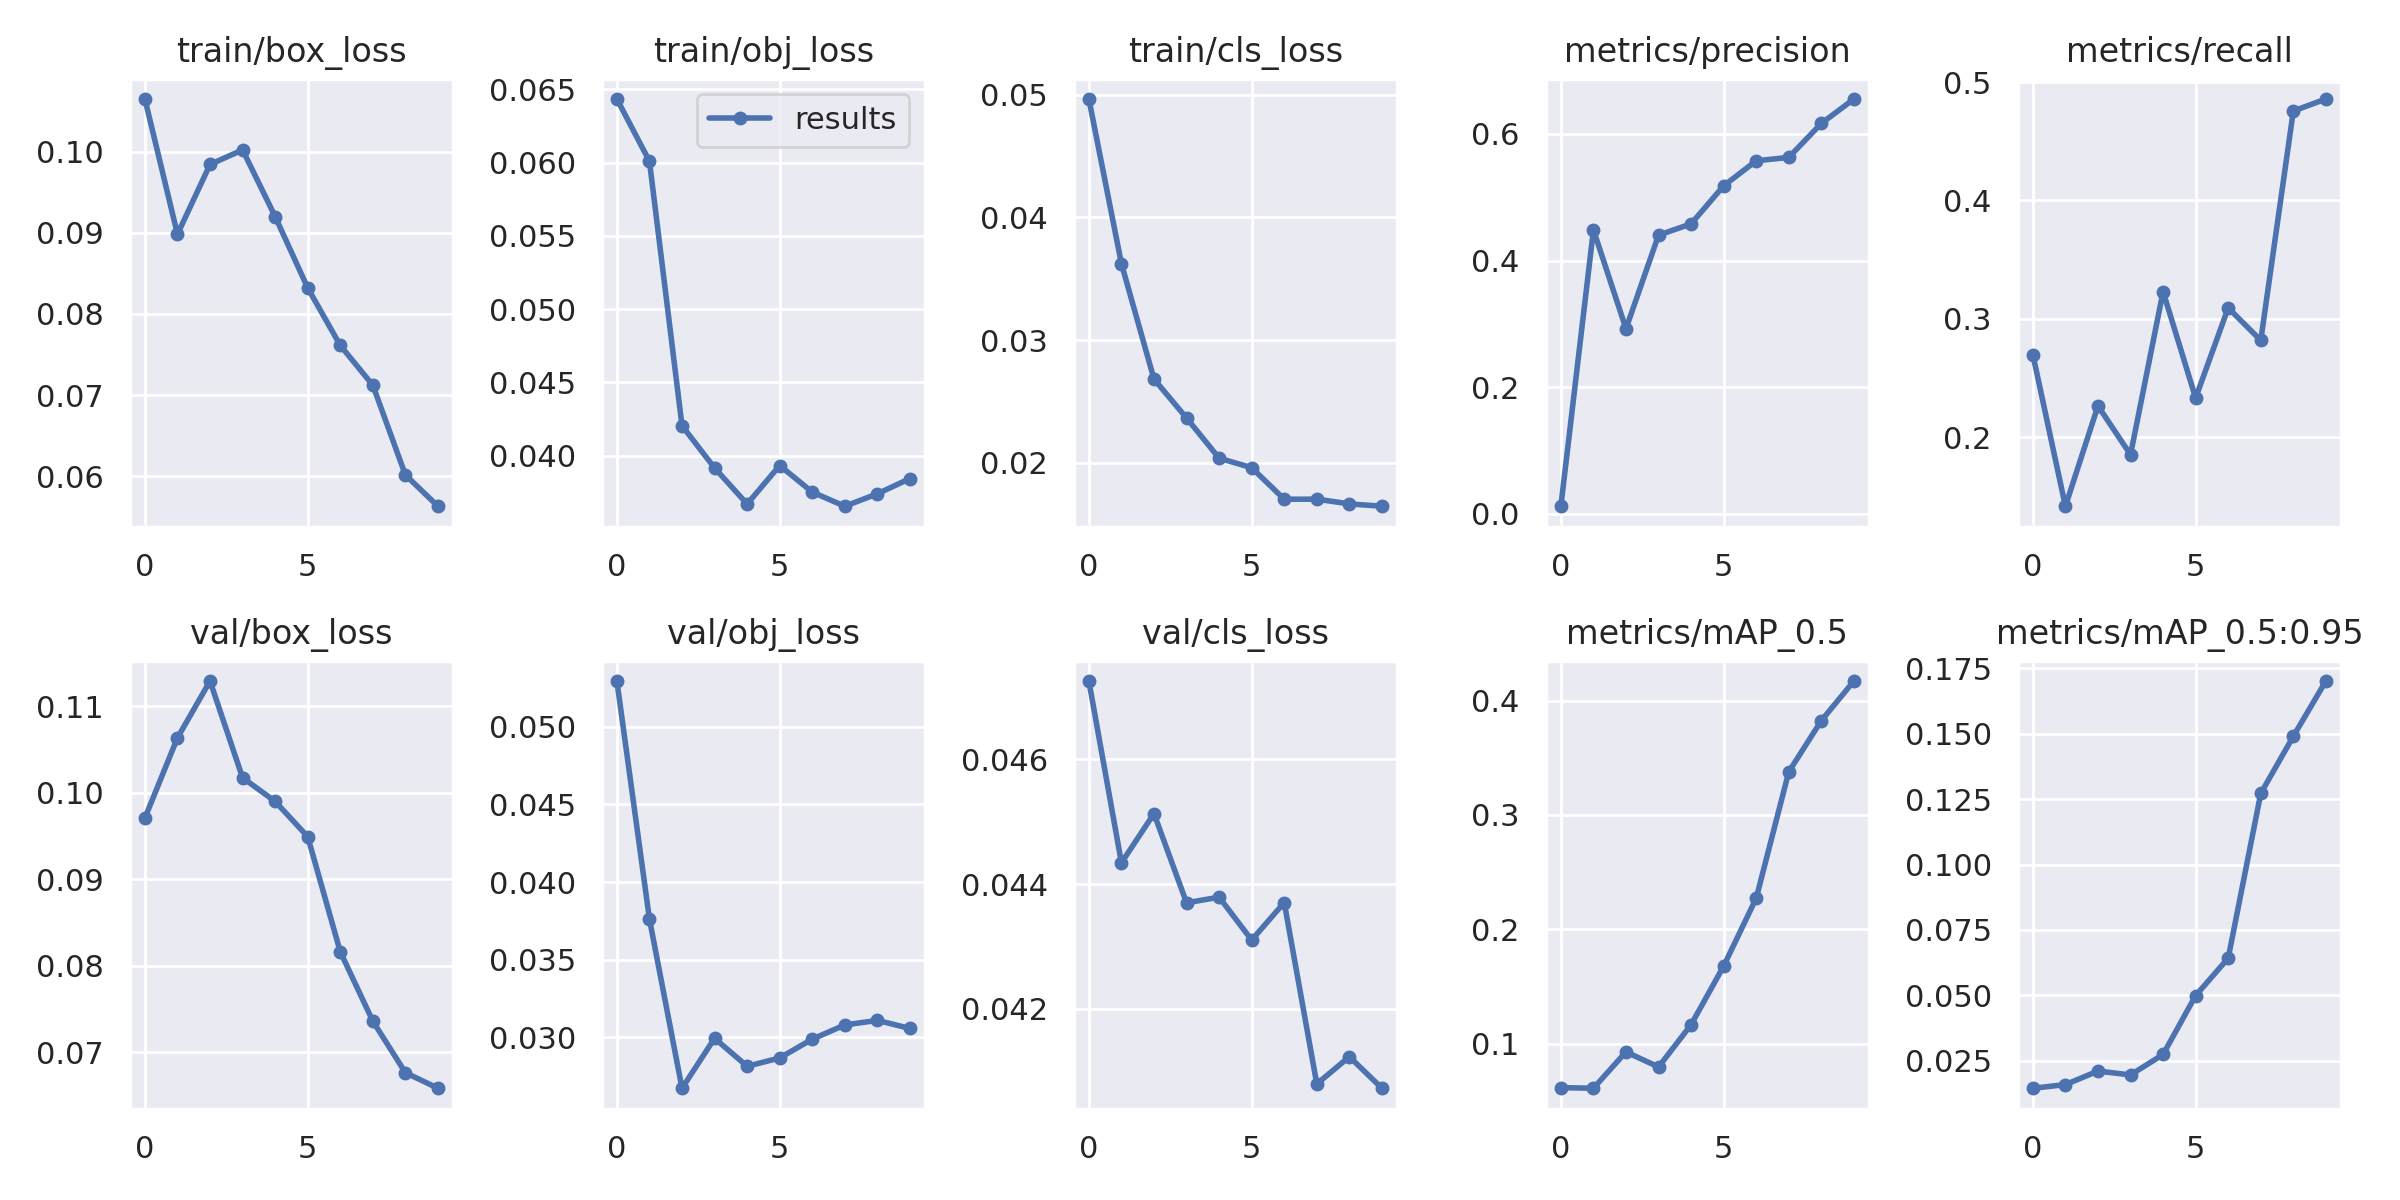

In [ ]:
Image(filename='runs/train/Model3/results.png',width=750)